In [40]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Mineria de datos
El data mining es el proceso de descubrir patrones, correlaciones y anomalías en grandes conjuntos de datos con el objetivo de extraer información útil. En el notebook se realizarán varias operaciones que son fundamentales en el proceso de data mining:

### Tutorial: Limpieza de Datos, conceptos básicos.*texto en cursiva*

La ciencia de datos parte por definir un problema o pregunta y por recolectar conjuntos de datos variados y lo más completos posibles para abordar dicho problema. En un mundo ideal, los datos que obtenemos vendrían perfectamente ordenados y listos para ser analizados, pero en la práctica, se requiere un trabajo significativo para convertir nuestra materia prima en un conjunto de datos bien estructurado, realmente apto para el modelamiento matemático o computacional.

En este tutorial, demostraremos algunas operaciones comunes de limpieza de datos, que suelen ser necesarias en cualquier proceso de ciencia de datos.

In [41]:
import pandas as pd

## 1. Inspección de datos.

In [42]:
df=pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/semana3/productos.csv',delimiter=';')
#df=pd.read_csv('productos.csv',delimiter=';')


df.head(15)

,Unnamed: 0,scraped,nombre del producto:nombre:nombre,id,clp,marca fabricante,variant,lista
0,0,05-04-22,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812.0,"$46,390",Gear,NaN,Categorías
1,1,05-04-22,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813.0,51590,Gear,NaN,Categorías
2,2,05-04-22,"Tablet SoyMomo Lite 2.0 7"" 2GB 16GB Wifi Quad ...",NaN,61890,SoyMomo,NaN,Categorías
3,3,05-04-22,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836.0,"$72,190",Lenovo,NaN,Categorías
4,4,05-04-22,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200.0,82490,Lenovo,NaN,Categorías
5,5,05-04-22,"Tablet Tab M8 8"" 2GB 32GB WiFi Quad Core Andr...",36684.0,NaN,Lenovo,NaN,Categorías
6,6,05-04-22,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765.0,92790,Kindle,NaN,Categorías
7,7,05-04-22,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765.0,92790,Kindle,NaN,Categorías
8,8,05-04-22,ERROR101,43205.0,92790,Lenovo,NaN,Categorías
9,9,05-04-22,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917.0,92790,Kindle,NaN,Categorías


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         48 non-null     int64  
 1   scraped                            48 non-null     object 
 2   nombre del producto:nombre:nombre  48 non-null     object 
 3   id                                 46 non-null     float64
 4   clp                                46 non-null     object 
 5   marca fabricante                   48 non-null     object 
 6   variant                            0 non-null      float64
 7   lista                              48 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.1+ KB


## 2. Columnas innecesarias o mal etiquetadas.

In [44]:

#Alternativa: inplace
df.drop(columns=['Unnamed: 0','scraped','variant','lista'],inplace=True)

In [45]:
df=df.rename(columns={'nombre del producto:nombre:nombre':'nombre_producto',
                      'clp':'precio_clp',
                      'marca fabricante':'fabricante'})

In [46]:
df.head()

# se explora el dataset nuevamente

,nombre_producto,id,precio_clp,fabricante
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812.0,"$46,390",Gear
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813.0,51590,Gear
2,"Tablet SoyMomo Lite 2.0 7"" 2GB 16GB Wifi Quad ...",NaN,61890,SoyMomo
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836.0,"$72,190",Lenovo
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200.0,82490,Lenovo


## 3. Datos duplicados.

La función `df.duplicated()` entrega una lista de valores booleans True/False que indica si un dato está duplicado o no.

El argumentp `keep` define si se marca sólo el primer duplicado, el último, o todos. Para identificar duplicados parciales, se utiliza el argumento `subset`, definido como un nombre o lista de nombres de columnas a utilizar para la comparación:

In [47]:
#encontrar duplicados totales (sólo la primera repetición)
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,True
8,False
9,False


In [48]:
#encontrar duplicados totales (todas las repeticiones)
df.duplicated(keep=False)

# con este comando se ven todos los datos duplicados

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,True
7,True
8,False
9,False


In [49]:
#ver los registros repetidos
df[df.duplicated(keep=False)]
# por ejemplo

,nombre_producto,id,precio_clp,fabricante
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765.0,92790,Kindle
7,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765.0,92790,Kindle


In [50]:
#eliminar duplicado total (conservar sólo el primero)
df.drop_duplicates(keep='first', inplace=True)
df.head(15)
# con este comando se elimina el duplicado solo conservando la primera tupla

,nombre_producto,id,precio_clp,fabricante
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812.0,"$46,390",Gear
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813.0,51590,Gear
2,"Tablet SoyMomo Lite 2.0 7"" 2GB 16GB Wifi Quad ...",NaN,61890,SoyMomo
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836.0,"$72,190",Lenovo
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200.0,82490,Lenovo
5,"Tablet Tab M8 8"" 2GB 32GB WiFi Quad Core Andr...",36684.0,NaN,Lenovo
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765.0,92790,Kindle
8,ERROR101,43205.0,92790,Lenovo
9,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917.0,92790,Kindle
10,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40918.0,NaN,Kindle


In [51]:
#encontrar duplicado parcial, marcar toda las repeticiones para 'id'
df.duplicated(subset='id', keep=False)

,0
0,False
1,False
2,True
3,False
4,False
5,False
6,False
8,False
9,False
10,False


Se observa que las filas 11, 12,13 tienen el mismo ID de product aunque precios diferentes

La fila 2 represente un NaN es decir no tiene id

# Limpieza de datos

Hasta esta parte del código podemos analizar que la limpieza de datos es un paso crucial en el proceso de Data Mining. En el notebook se hicieron las siguientes acciones:

- Eliminación de columnas innecesarias: Se eliminan columnas como Unnamed: 0, scraped, variant, y lista porque no aportan información relevante para el análisis.

- Renombrado de columnas: Se renombran las columnas para que sean más descriptivas y fáciles de entender.

- Manejo de datos duplicados: Se identifican y eliminan filas duplicadas para evitar sesgos en el análisis.

- Manejo de valores nulos: Aunque no se muestra explícitamente en el notebook, es importante manejar los valores nulos (por ejemplo, en la columna id o precio_clp).

# Exploración de Datos
La exploración de datos es el proceso de analizar y resumir las características principales de un conjunto de datos. En el notebook, se utiliza:

- Inspección inicial: Se utiliza df.head() y df.info() para obtener una vista previa de los datos y entender su estructura.

- Identificación de duplicados: Se utiliza df.duplicated() para encontrar filas duplicadas y decidir cómo manejarlas.

# Transformación de Datos
En algunos casos, es necesario transformar los datos para que sean más útiles para el análisis. En el notebook:

- Reemplazo de valores: Se reemplaza el precio de un producto duplicado por el valor promedio de los precios duplicados.




In [52]:
df[df.duplicated(subset=['nombre_producto','id'], keep=False)]

,nombre_producto,id,precio_clp,fabricante
12,"Tablet SoyMomo Pro 8"" 2GB 32GB WiFi Octa Core ...",45067.0,103090,SoyMomo
13,"Tablet SoyMomo Pro 8"" 2GB 32GB WiFi Octa Core ...",45067.0,120090,SoyMomo


In [53]:
#reemplazamos el precio por valor promedio de los dos duplicados, y eliminamos uno de ellos
df.at[12,'precio_clp']='111590'
df.drop(index=13,inplace=True)
df

,nombre_producto,id,precio_clp,fabricante
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812.0,"$46,390",Gear
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813.0,51590,Gear
2,"Tablet SoyMomo Lite 2.0 7"" 2GB 16GB Wifi Quad ...",NaN,61890,SoyMomo
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836.0,"$72,190",Lenovo
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200.0,82490,Lenovo
5,"Tablet Tab M8 8"" 2GB 32GB WiFi Quad Core Andr...",36684.0,NaN,Lenovo
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765.0,92790,Kindle
8,ERROR101,43205.0,92790,Lenovo
9,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917.0,92790,Kindle
10,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40918.0,NaN,Kindle


In [54]:
#reiniciar índice para mantener orden correlativo
df.reset_index(inplace=True,drop=True)
df

,nombre_producto,id,precio_clp,fabricante
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812.0,"$46,390",Gear
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813.0,51590,Gear
2,"Tablet SoyMomo Lite 2.0 7"" 2GB 16GB Wifi Quad ...",NaN,61890,SoyMomo
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836.0,"$72,190",Lenovo
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200.0,82490,Lenovo
5,"Tablet Tab M8 8"" 2GB 32GB WiFi Quad Core Andr...",36684.0,NaN,Lenovo
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765.0,92790,Kindle
7,ERROR101,43205.0,92790,Lenovo
8,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917.0,92790,Kindle
9,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40918.0,NaN,Kindle


## 4. Datos Faltantes o Nulos.

Los métodos `df.isna()`y `dr.dropna()` permiten identificar y eliminar los registros con datos nulos (NaN), respectivamente.

In [55]:
df.isna()

,nombre_producto,id,precio_clp,fabricante
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [56]:
df.dropna(inplace=True)
df.head(10)

,nombre_producto,id,precio_clp,fabricante
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812.0,"$46,390",Gear
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813.0,51590,Gear
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836.0,"$72,190",Lenovo
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200.0,82490,Lenovo
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765.0,92790,Kindle
7,ERROR101,43205.0,92790,Lenovo
8,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917.0,92790,Kindle
11,"Tablet SoyMomo Pro 8"" 2GB 32GB WiFi Octa Core ...",45067.0,111590,SoyMomo
12,"Tablet Pro T310 10,1"" 2GB 32GB WiFi Quad Core ...",43421.0,103090,Gear
13,"Tablet Smart M8 8"" 2GB 32GB WiFi con Estación ...",37245.0,103090,Lenovo


¿Hay más datos "nulos" que no estén identificados como NaN? Por ejemplo, el dato `ERROR101`.

¿Cómo se corrigen o eliminan? Para que Python los trate como datos nulos, es necesario reemplazar por el valor `np.nan`.

In [58]:
import numpy as np
df.replace('ERROR101',np.nan,inplace=True)
# con este codigo reemplazamos el ERROR101 por NaN

In [59]:
df

,nombre_producto,id,precio_clp,fabricante
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812.0,"$46,390",Gear
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813.0,51590,Gear
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836.0,"$72,190",Lenovo
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200.0,82490,Lenovo
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765.0,92790,Kindle
7,NaN,43205.0,92790,Lenovo
8,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917.0,92790,Kindle
11,"Tablet SoyMomo Pro 8"" 2GB 32GB WiFi Octa Core ...",45067.0,111590,SoyMomo
12,"Tablet Pro T310 10,1"" 2GB 32GB WiFi Quad Core ...",43421.0,103090,Gear
13,"Tablet Smart M8 8"" 2GB 32GB WiFi con Estación ...",37245.0,103090,Lenovo


In [60]:
#ahora podemos utilizar el método dropna, si es que decidimos eliminar estos registros del dataframe.
df.dropna(inplace=True)
df
# Con este comando dropna se borran las filas que contienen NaN

,nombre_producto,id,precio_clp,fabricante
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812.0,"$46,390",Gear
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813.0,51590,Gear
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836.0,"$72,190",Lenovo
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200.0,82490,Lenovo
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765.0,92790,Kindle
8,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917.0,92790,Kindle
11,"Tablet SoyMomo Pro 8"" 2GB 32GB WiFi Octa Core ...",45067.0,111590,SoyMomo
12,"Tablet Pro T310 10,1"" 2GB 32GB WiFi Quad Core ...",43421.0,103090,Gear
13,"Tablet Smart M8 8"" 2GB 32GB WiFi con Estación ...",37245.0,103090,Lenovo
14,"Tablet MatePad T10 9.7"" 2GB 32GB WiFi Deepsea ...",41923.0,103090,Huawei


Es importante notar que no siempre es necesario eliminar datos para los cuales alguna de las columnas tienen valor nulo Si el valor nulo corresoonde a una variable que no es esencial para el análisis, entonces se puede conservar el dato y así aprovechar la información contenida en las otras columnas. El argumento `subset` permite especificar la lista de columnas a considerar para la eliminación de datos nulos.

## 5. Tipos de datos.

In [61]:
#Revisamos los tipos de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 45
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre_producto  41 non-null     object 
 1   id               41 non-null     float64
 2   precio_clp       41 non-null     object 
 3   fabricante       41 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.6+ KB


Hay tipos de datos que no son adecuados al tratamiento que se le quiere dar a cada columna. Por ejemplo, el `id` debería ser un número entero, y el `precio_clp` debería ser tratado como un dato numérico, de manera de poder aplicar funciones matemáticas.<br>

Por ejemplo, si queremos calcular el precio promedio, obtendríamos un error, dado que no es posible calcular el promedio de una serie tipo `object`.

In [62]:
#Este comando arroja un error
df['precio_clp'].mean()


TypeError: Could not convert string '$46,39051590$72,190824909279092790111590103090103090103090113390118590123690133990133990133990133990133990133990133990139190139190144290144290159790180390185590206190206190278390278390299990309290319590350490350490360790360790360790381490443290' to numeric

Por lo tanto, se requiere convertir la variable `precio_clp` al tipo de datos `float`. Sin embargo, esto no es posible isn antes aplicar algunas operaciones de limpieza de strings, para llevar los datos a un formato numérico que puede ser convertido a `float`.

In [63]:
#Primero convertimos el tipo de dato de 'id'
df['id']=df['id'].astype(int)

El siguiente comando genera un error, ya que los datos en `precio_clp` contienen caracteres como `$` y `,` que deben ser eliminados antes de convertir a float.


In [64]:
#Este comando genera un error, ya que los datos en precio_clp contienen caracteres como $ y , que deben ser eliminados antes de convertir a float.
df['precio_clp']=df['precio_clp'].astype(float)

ValueError: could not convert string to float: '$46,390'

In [65]:
df.head()

,nombre_producto,id,precio_clp,fabricante
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812,"$46,390",Gear
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813,51590,Gear
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836,"$72,190",Lenovo
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200,82490,Lenovo
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765,92790,Kindle


## 6. Limpieza de strings.

Pandas implementa métodos de strings de Python en forma vectorizada para una serie, mediante el atributo `str`:

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html

In [66]:
#Eliminar caracter $ reemplazando por un caracter vacío.
df['precio_clp']=df['precio_clp'].str.replace('$','')
df

,nombre_producto,id,precio_clp,fabricante
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812,"46,390",Gear
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813,51590,Gear
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836,"72,190",Lenovo
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200,82490,Lenovo
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765,92790,Kindle
8,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917,92790,Kindle
11,"Tablet SoyMomo Pro 8"" 2GB 32GB WiFi Octa Core ...",45067,111590,SoyMomo
12,"Tablet Pro T310 10,1"" 2GB 32GB WiFi Quad Core ...",43421,103090,Gear
13,"Tablet Smart M8 8"" 2GB 32GB WiFi con Estación ...",37245,103090,Lenovo
14,"Tablet MatePad T10 9.7"" 2GB 32GB WiFi Deepsea ...",41923,103090,Huawei


In [67]:
#Eliminar caracter , reemplazando por un caracter vacío.
df['precio_clp']=df['precio_clp'].str.replace(',','')
df

,nombre_producto,id,precio_clp,fabricante
0,"Tablet Space 7"" 1GB 16GB WiFi Quad Core Android",43812,46390,Gear
1,"Tablet Space Kids 7"" 1GB 16GB WiFi Quad Core A...",43813,51590,Gear
3,"Tablet Tab M7 7"" HD 1GB 16GB 4G LTE Onix Black",41836,72190,Lenovo
4,"Tablet M7 2 32GB 7"" HD Wifi Iron grey",45200,82490,Lenovo
6,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",44765,92790,Kindle
8,"Kindle Touch 6"" 8GB Luz frontal ajustable WiFi...",40917,92790,Kindle
11,"Tablet SoyMomo Pro 8"" 2GB 32GB WiFi Octa Core ...",45067,111590,SoyMomo
12,"Tablet Pro T310 10,1"" 2GB 32GB WiFi Quad Core ...",43421,103090,Gear
13,"Tablet Smart M8 8"" 2GB 32GB WiFi con Estación ...",37245,103090,Lenovo
14,"Tablet MatePad T10 9.7"" 2GB 32GB WiFi Deepsea ...",41923,103090,Huawei


Ahora sí es posible convertir a `float`:

In [68]:
df['precio_clp']=df['precio_clp'].astype(float)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 45
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre_producto  41 non-null     object 
 1   id               41 non-null     int64  
 2   precio_clp       41 non-null     float64
 3   fabricante       41 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB


In [70]:
#Y podemos calcular el precio promedio de un Tablet.
df['precio_clp'].mean()

np.float64(189063.17073170733)

# Visualización de los datos

La visualización de datos es una parte esencial del Data Mining, ya que permite entender mejor los datos y comunicar los hallazgos de manera efectiva.

### Histograma de precios

Un histograma es útil para entender la distribución de los precios de los productos. Puedes usar la biblioteca matplotlib o seaborn para crear un histograma.




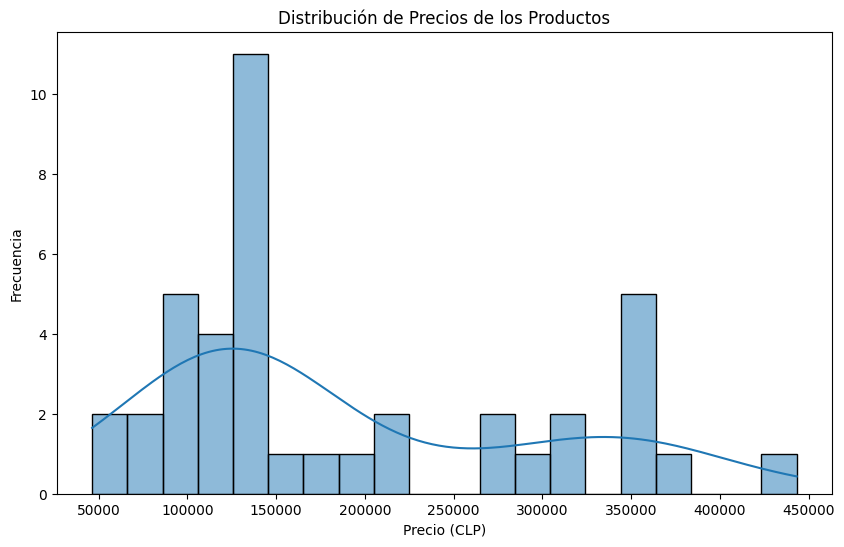

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna 'precio_clp' a numérica (eliminando el símbolo '$' y las comas)
df['precio_clp'] = df['precio_clp'].replace('[\$,]', '', regex=True).astype(float)

# Crear un histograma de los precios
plt.figure(figsize=(10, 6))
sns.histplot(df['precio_clp'], bins=20, kde=True)
plt.title('Distribución de Precios de los Productos')
plt.xlabel('Precio (CLP)')
plt.ylabel('Frecuencia')
plt.show()

###  Gráfico de Barras por Fabricante
Puedes visualizar la cantidad de productos por fabricante utilizando un gráfico de barras.


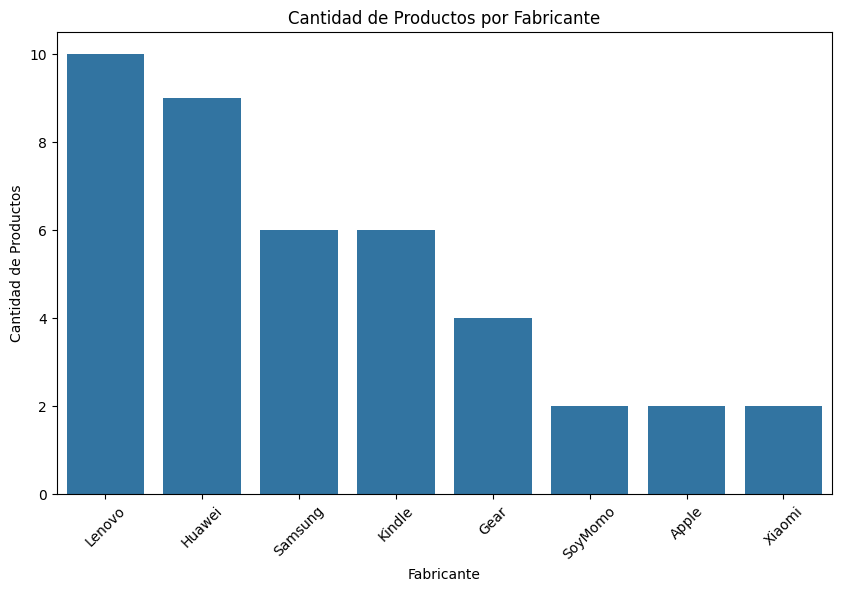

In [73]:
# Contar la cantidad de productos por fabricante
fabricante_counts = df['fabricante'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=fabricante_counts.index, y=fabricante_counts.values)
plt.title('Cantidad de Productos por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Cantidad de Productos')
plt.xticks(rotation=45)
plt.show()

### Diagrama de Caja (Boxplot) de Precios por Fabricante

Un diagrama de caja es útil para comparar la distribución de precios entre diferentes fabricantes.



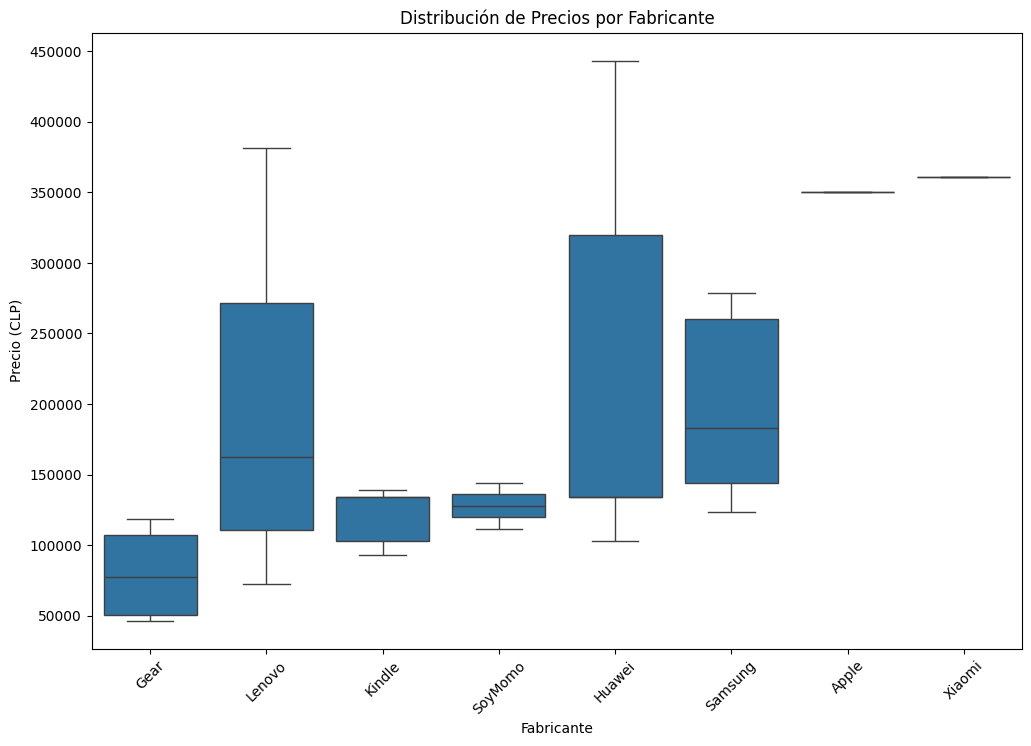

In [74]:
# Crear un diagrama de caja de precios por fabricante
plt.figure(figsize=(12, 8))
sns.boxplot(x='fabricante', y='precio_clp', data=df)
plt.title('Distribución de Precios por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Precio (CLP)')
plt.xticks(rotation=45)
plt.show()